<a href="https://colab.research.google.com/github/asyanez/Class5357/blob/main/demo_for_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the readxl package if you haven't already
if(!require(readxl)){
    install.packages("readxl")
}

# Load the readxl package
library(readxl)

# Read the excel file
epi_data <- read_excel("Epi2024.xlsx")

# Print the first few rows of the data to check if it was read correctly
head(epi_data)

# You can also view the dimensions of the data
dim(epi_data)

Read in my data for class

In [ ]:
# Assuming your file is in the current working directory
epi_data <- read.csv("/epi.csv")

# If your file is in a different directory, specify the full path:
# epi_data <- read.csv("/epi.csv")

# Print the first few rows of the data to check if it was read correctly
head(epi_data)

dim(epi_data)


,Record.ID,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Case.Definition,DOB,Results,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,78999,January,ELP,11/5/2023,,,Giardiasis,Confirmed,2/4/2017,Positive,No,6,Female,Non-Hispanic,Complete,,,10/31/2023,
2,79002,January,Migrant,9/28/2023,9/28/2023 15:17,9/28/2023,Cryptosporidiosis,Probable,7/15/2022,Positive,Yes,1,Female,,Complete,No,No,9/25/2023,No
3,79003,January,ELP,11/19/2023,,11/21/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,6/2/1990,Identified,No,33,Male,Hispanic,Complete,Yes,No,11/12/2023,No
4,79004,January,ELP,10/30/2023,,10/30/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,4/11/1963,Identified,No,60,Male,Hispanic,Complete,Yes,No,10/25/2023,No
5,79005,January,ELP,10/11/2023,,10/11/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,5/31/1937,Identified,No,86,Female,Hispanic,Complete,Yes,Yes,10/2/2023,Yes
6,79006,January,ELP,10/4/2023,,,Other,Not a case,8/23/1982,Identified,No,41,Male,Hispanic,Complete,,,9/27/2023,


[1] 2526   19

Now create a summary table

In [ ]:
names(epi_data)

[1] "Record.ID"                    "Month"                       
 [3] "Jurisdiction"                 "Date.of.Report"              
 [5] "X1st.Attempt"                 "Investigation.completed.date"
 [7] "Condition.reported"           "Case.Definition"             
 [9] "DOB"                          "Results"                     
[11] "Case.Investigated"            "Age"                         
[13] "Gender"                       "Ethnicity"                   
[15] "Complete."                    "Hospital.Admission"          
[17] "ICU.Admission"                "Collection.date"             
[19] "Expired"

In [ ]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

Loading required package: ggplot2



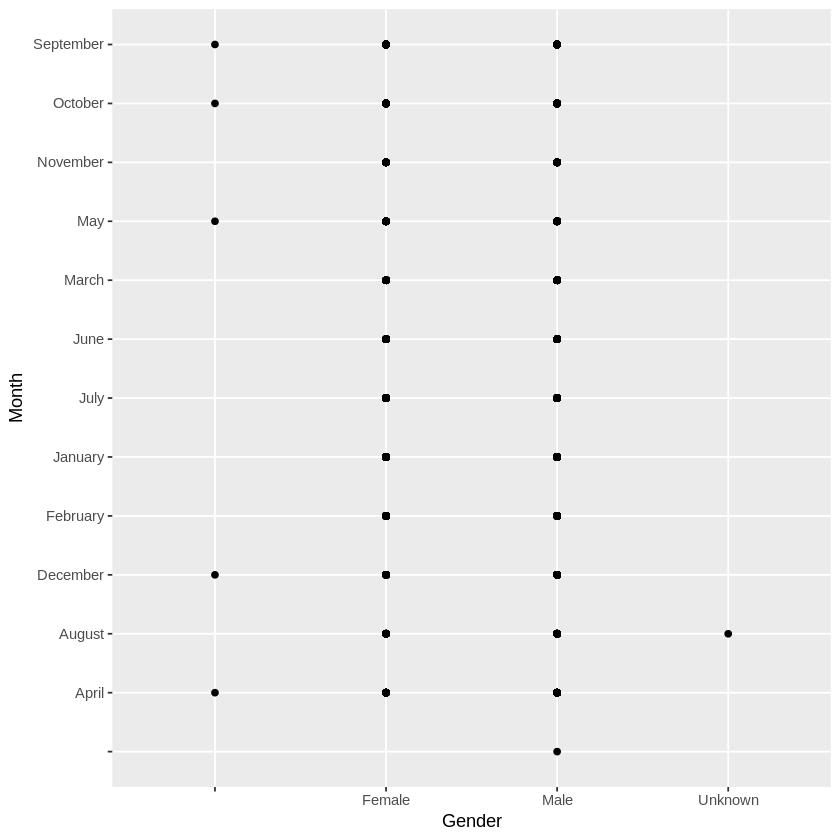

In [ ]:
ggplot(epi_data, aes(x = Gender, y = Month)) +
  geom_point()

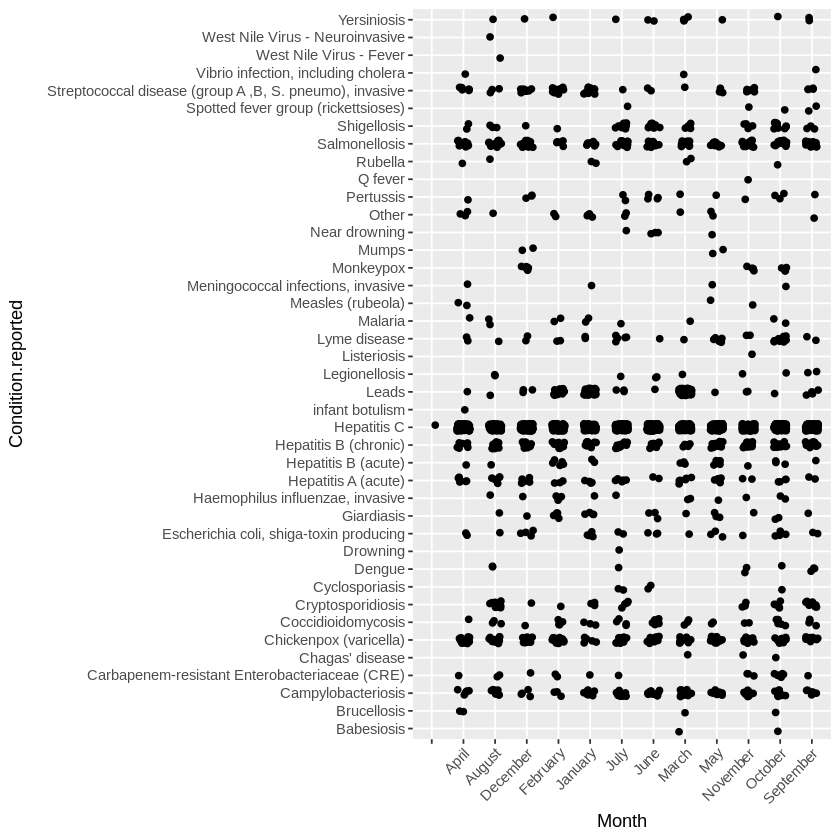

In [ ]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Create the scatterplot
ggplot(epi_data, aes(x = Month, y = Condition.reported)) +
  geom_jitter(width = 0.2, height = 0.2) +  # Adjust width and height for jitter
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [ ]:
# Filter for Hepatitis C cases
hep_c_cases <- epi_data[epi_data$Condition.reported == "Hepatitis C", ]

# Calculate the average age
avg_age <- mean(hep_c_cases$Age, na.rm = TRUE)

# Print the average age
print(avg_age)

[1] 53.75516


Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


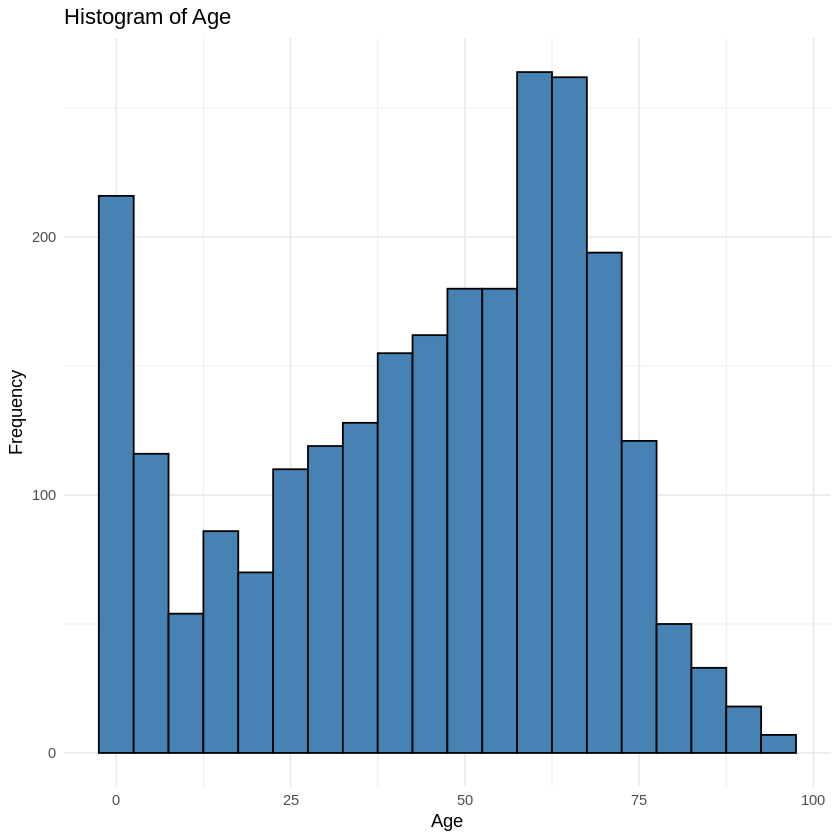

In [ ]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Create the histogram
ggplot(epi_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +  # Adjust binwidth as needed
  labs(title = "Histogram of Age", x = "Age", y = "Frequency") +
  theme_minimal()

In [ ]:
Q1 <- quantile(epi_data$Age, 0.25, na.rm = TRUE)
Q3 <- quantile(epi_data$Age, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

upper_bound <- Q3 + 1.5 * IQR
lower_bound <- Q1 - 1.5 * IQR

outliers <- epi_data$Age[epi_data$Age > upper_bound | epi_data$Age < lower_bound]
print(outliers)

[1] NA


In [ ]:
epi_data$Condition_Category <- ifelse(epi_data$Condition.reported %in% c("Hepatitis C", "Hepatitis B"), "Hepatitis",
                                      ifelse(epi_data$Condition.reported %in% c("Salmonella", "E. coli"), "Foodborne Illness",
                                             "Other"))

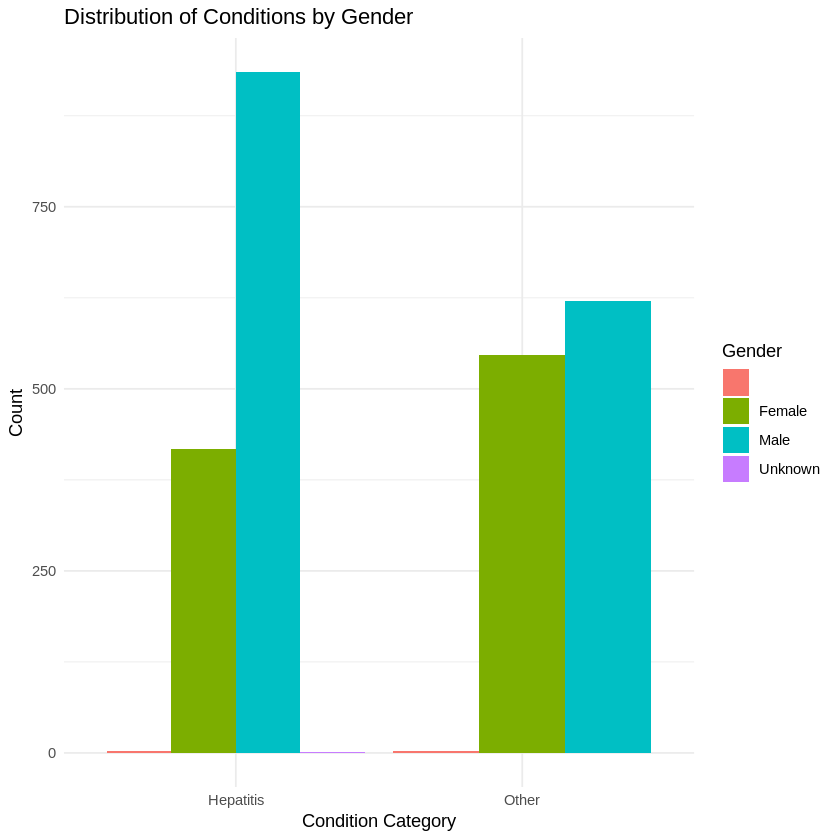

In [ ]:
ggplot(new_table, aes(x = Condition_Category, fill = Gender)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of Conditions by Gender", x = "Condition Category", y = "Count") +
  theme_minimal()

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


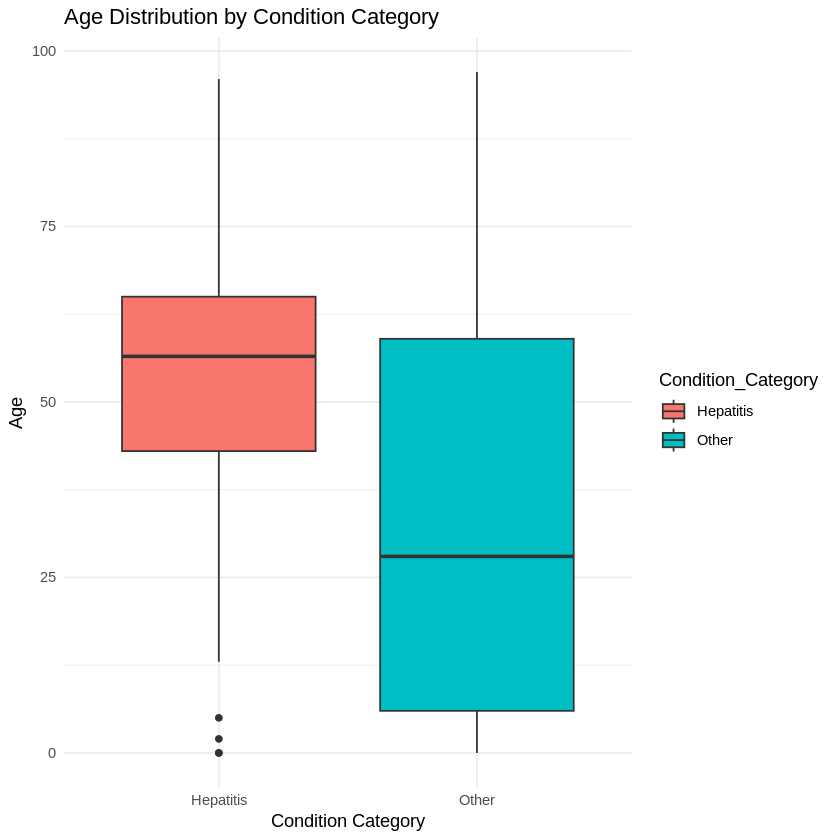

In [ ]:
ggplot(new_table, aes(x = Condition_Category, y = Age, fill = Condition_Category)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Condition Category", x = "Condition Category", y = "Age") +
  theme_minimal()

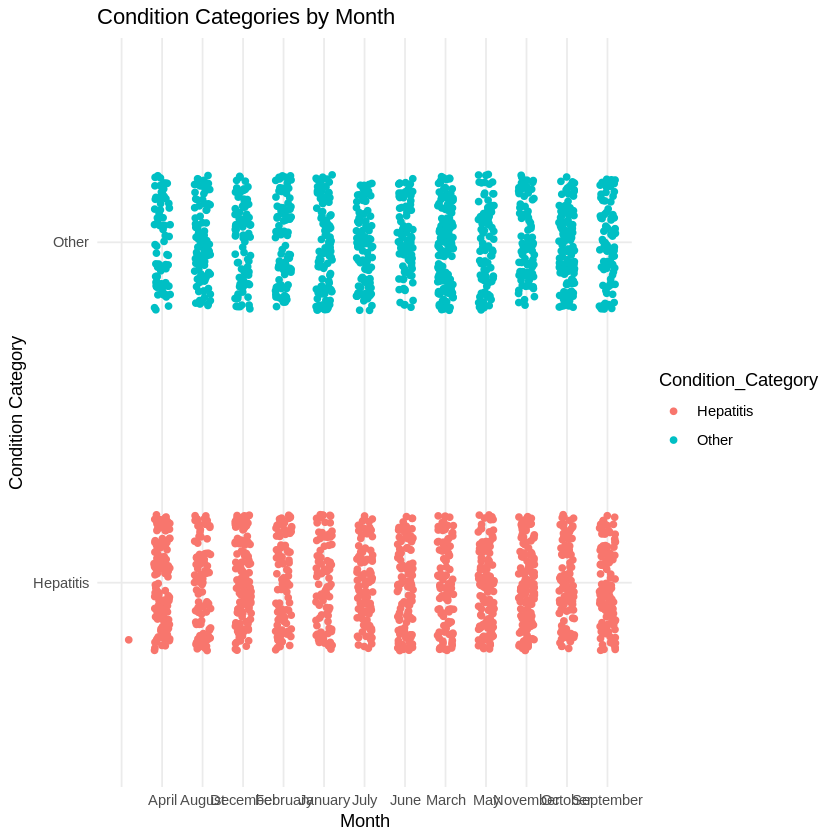

In [ ]:
ggplot(new_table, aes(x = Month, y = Condition_Category, color = Condition_Category)) +
  geom_jitter(width = 0.2, height = 0.2) +
  labs(title = "Condition Categories by Month", x = "Month", y = "Condition Category") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

In [ ]:
# Assuming your file is in the current working directory
epi_data <- read.csv("//content/epi.csv")

# If your file is in a different directory, specify the full path:
# epi_data <- read.csv("/path/to/your/file/epi.csv")

# Print the first few rows of the data to check if it was read correctly
head(epi_data)

,Record.ID,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Case.Definition,DOB,Results,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,78999,January,ELP,11/5/2023,,,Giardiasis,Confirmed,2/4/2017,Positive,No,6,Female,Non-Hispanic,Complete,,,10/31/2023,
2,79002,January,Migrant,9/28/2023,9/28/2023 15:17,9/28/2023,Cryptosporidiosis,Probable,7/15/2022,Positive,Yes,1,Female,,Complete,No,No,9/25/2023,No
3,79003,January,ELP,11/19/2023,,11/21/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,6/2/1990,Identified,No,33,Male,Hispanic,Complete,Yes,No,11/12/2023,No
4,79004,January,ELP,10/30/2023,,10/30/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,4/11/1963,Identified,No,60,Male,Hispanic,Complete,Yes,No,10/25/2023,No
5,79005,January,ELP,10/11/2023,,10/11/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,5/31/1937,Identified,No,86,Female,Hispanic,Complete,Yes,Yes,10/2/2023,Yes
6,79006,January,ELP,10/4/2023,,,Other,Not a case,8/23/1982,Identified,No,41,Male,Hispanic,Complete,,,9/27/2023,


In [ ]:
# Filter for foodborne illnesses
foodborne_illnesses <- c("Campylobacteriosis", "Cryptosporidiosis",
                         "Escherichia coli, shiga-toxin producing", "Infant botulism",
                         "Salmonellosis", "Yersiniosis")

filtered_data <- epi_data[epi_data$Condition.reported %in% foodborne_illnesses, ]

# Display the first few rows of the filtered data
head(filtered_data)

,Record.ID,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Case.Definition,DOB,Results,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,79002,January,Migrant,9/28/2023,9/28/2023 15:17,9/28/2023,Cryptosporidiosis,Probable,7/15/2022,Positive,Yes,1,Female,,Complete,No,No,9/25/2023,No
9,79014,January,ELP,8/9/2023,8/11/2023 14:43,8/11/2023,Cryptosporidiosis,Probable,8/10/1933,Positive,Yes,90,Female,,Complete,,,8/5/2023,
58,79082,January,ELP,7/27/2023,7/29/2023 8:00,7/30/2023,Salmonellosis,Probable,4/12/2000,Positive,Yes,23,Female,Hispanic,Complete,Yes,No,7/9/2023,No
59,79083,January,ELP,11/16/2023,11/18/2023 11:20,11/26/2023,Salmonellosis,Confirmed,8/20/2018,Positive,Yes,5,Female,Hispanic,Complete,,,10/20/2023,
60,79084,January,ELP,9/13/2023,9/16/2023 10:00,9/23/2023,Campylobacteriosis,Probable,8/2/2016,Identified,Yes,7,Female,Hispanic,Complete,Yes,No,9/9/2023,No
61,79085,January,ELP,9/15/2023,9/22/2023 14:50,9/23/2023,Campylobacteriosis,Probable,6/24/2021,Identified,Yes,2,Male,Hispanic,Complete,Yes,Yes,9/13/2023,No


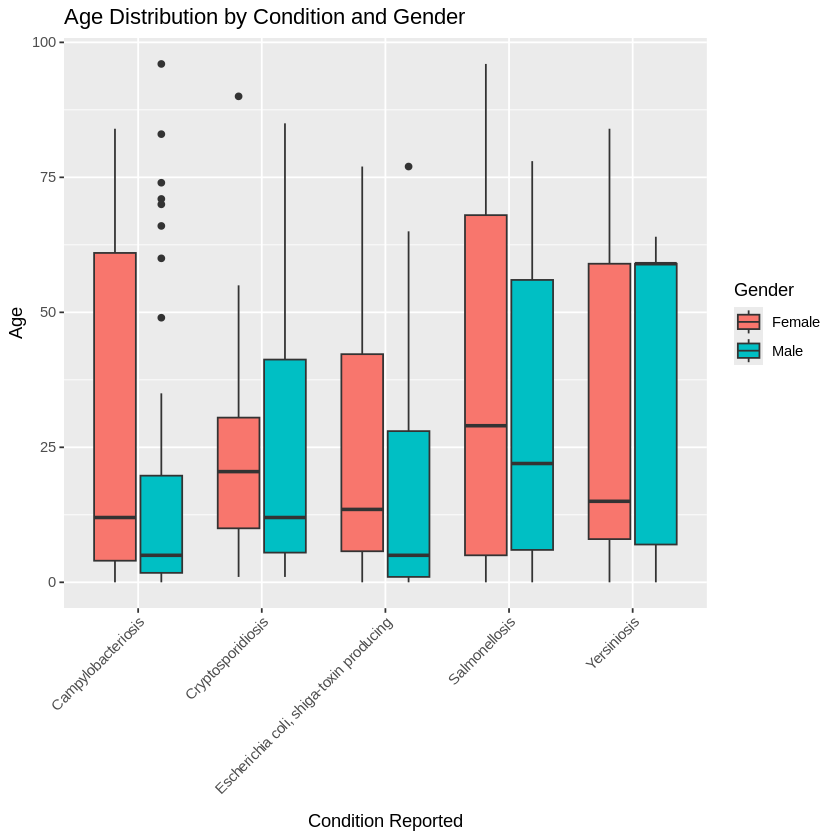

In [ ]:
library(ggplot2)

ggplot(filtered_data, aes(x = Condition.reported, y = Age, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Condition and Gender", x = "Condition Reported", y = "Age") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

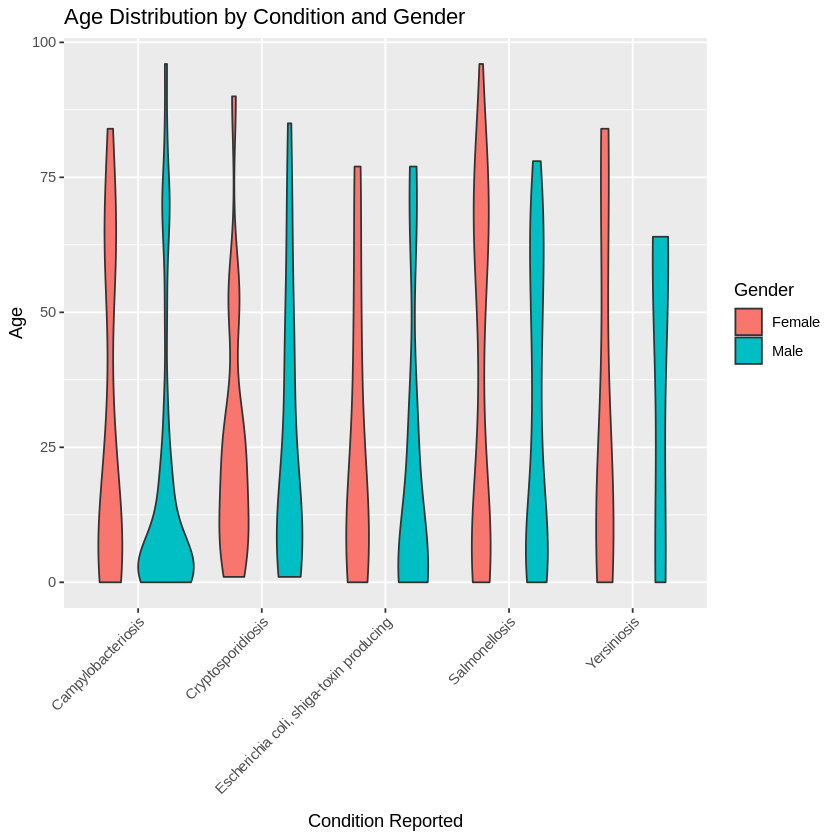

In [ ]:
library(ggplot2)

ggplot(filtered_data, aes(x = Condition.reported, y = Age, fill = Gender)) +
  geom_violin() +
  labs(title = "Age Distribution by Condition and Gender", x = "Condition Reported", y = "Age") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [2]:
# Read the CSV file into a data frame
epi_data <- read.csv("epi.csv")

# Print the first few rows of the data frame
head(epi_data)

# Print the dimensions of the data frame
dim(epi_data)

,Record.ID,Year,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Other,Case.Definition,⋯,Epi.Investigator,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,78999,2024,January,ELP,1/2/2024,,,Giardiasis,,Confirmed,⋯,Zuleika Curiel,No,6,Female,Non-Hispanic,Complete,,,12/28/2023,
2,79002,2024,January,Migrant,1/2/2024,1/2/2024 15:17,1/2/2024,Cryptosporidiosis,,Probable,⋯,Zuleika Curiel,Yes,1,Female,,Complete,No,No,12/30/2023,No
3,79003,2024,January,ELP,1/1/2024,,1/3/2024,"Streptococcal disease (group A ,B, S. pneumo), invasive",,Confirmed,⋯,,No,33,Male,Hispanic,Complete,Yes,No,12/25/2023,No
4,79004,2024,January,ELP,1/3/2024,,1/3/2024,"Streptococcal disease (group A ,B, S. pneumo), invasive",,Confirmed,⋯,,No,60,Male,Hispanic,Complete,Yes,No,12/29/2023,No
5,79005,2024,January,ELP,1/3/2024,,1/3/2024,"Streptococcal disease (group A ,B, S. pneumo), invasive",,Confirmed,⋯,,No,86,Female,Hispanic,Complete,Yes,Yes,12/25/2023,Yes
6,79006,2024,January,ELP,1/3/2024,,,Other,CRE Acinetobacter baumanni,Not a case,⋯,,No,41,Male,Hispanic,Complete,,,12/27/2023,


[1] 2526   28

In [3]:
# Filter for foodborne illnesses
foodborne_illnesses <- c("Campylobacteriosis", "Cryptosporidiosis",
                         "Escherichia coli, shiga-toxin producing", "Infant botulism",
                         "Salmonellosis", "Yersiniosis")

filtered_data <- epi_data[epi_data$Condition.reported %in% foodborne_illnesses, ]

# Display the first few rows of the filtered data
head(filtered_data)

,Record.ID,Year,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Other,Case.Definition,⋯,Epi.Investigator,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,79002,2024,January,Migrant,1/2/2024,1/2/2024 15:17,1/2/2024,Cryptosporidiosis,,Probable,⋯,Zuleika Curiel,Yes,1,Female,,Complete,No,No,12/30/2023,No
9,79014,2024,January,ELP,1/3/2024,1/5/2024 14:43,1/5/2024,Cryptosporidiosis,,Probable,⋯,Zuleika Curiel,Yes,90,Female,,Complete,,,12/30/2023,
58,79082,2024,January,ELP,1/9/2024,1/11/2024 8:00,1/12/2024,Salmonellosis,,Probable,⋯,saul cuevas,Yes,23,Female,Hispanic,Complete,Yes,No,12/22/2023,No
59,79083,2024,January,ELP,1/2/2024,1/4/2024 11:20,1/12/2024,Salmonellosis,,Confirmed,⋯,saul cuevas,Yes,5,Female,Hispanic,Complete,,,12/6/2023,
60,79084,2024,January,ELP,1/2/2024,1/5/2024 10:00,1/12/2024,Campylobacteriosis,,Probable,⋯,saul cuevas,Yes,7,Female,Hispanic,Complete,Yes,No,12/29/2023,No
61,79085,2024,January,ELP,1/4/2024,1/11/2024 14:50,1/12/2024,Campylobacteriosis,,Probable,⋯,saul cuevas,Yes,2,Male,Hispanic,Complete,Yes,Yes,1/2/2024,No


Loading required package: ggplot2

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


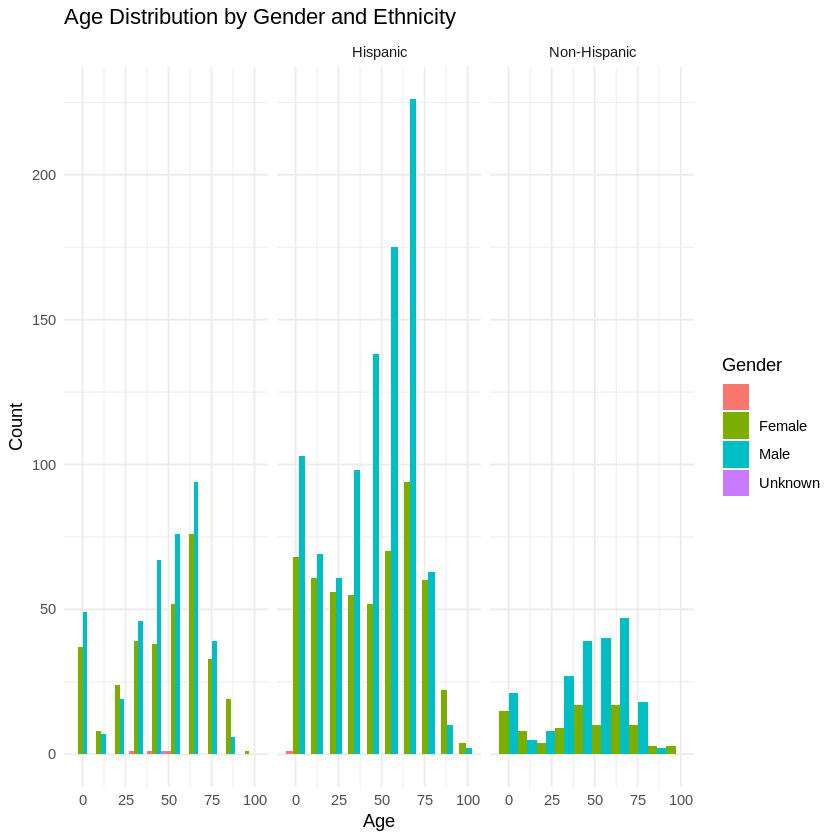

In [4]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Assuming your data is in a data frame called 'epi_data'
# Replace 'epi_data' with the actual name of your data frame

ggplot(epi_data, aes(x = Age, fill = Gender)) +
  geom_histogram(position = "dodge", bins = 10) +
  facet_wrap(~Ethnicity) +
  labs(title = "Age Distribution by Gender and Ethnicity",
       x = "Age",
       y = "Count") +
   theme_minimal()

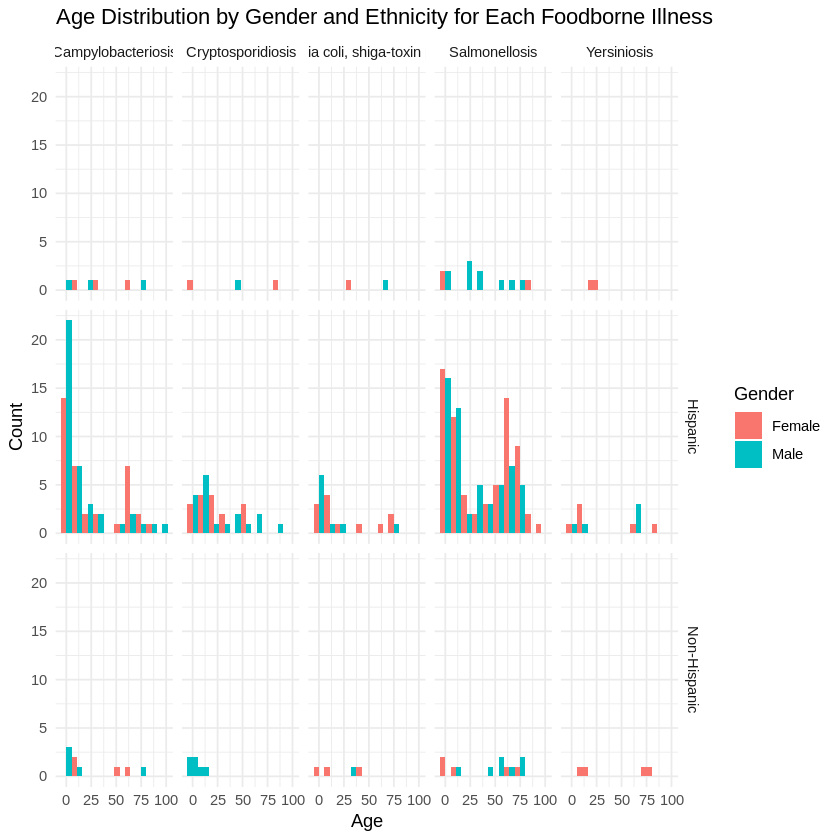

In [5]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Assuming your data is in a data frame called 'epi_data'
# Replace 'epi_data' with the actual name of your data frame

# Define the list of foodborne illnesses
foodborne_illnesses <- c("Campylobacteriosis", "Cryptosporidiosis",
                         "Escherichia coli, shiga-toxin producing", "Infant botulism",
                         "Salmonellosis", "Yersiniosis")

# Filter the data for foodborne illnesses
filtered_data <- epi_data[epi_data$Condition.reported %in% foodborne_illnesses, ]


ggplot(filtered_data, aes(x = Age, fill = Gender)) +
  geom_histogram(position = "dodge", bins = 10) +
  facet_grid(Ethnicity~Condition.reported) +
  labs(title = "Age Distribution by Gender and Ethnicity for Each Foodborne Illness",
       x = "Age",
       y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()

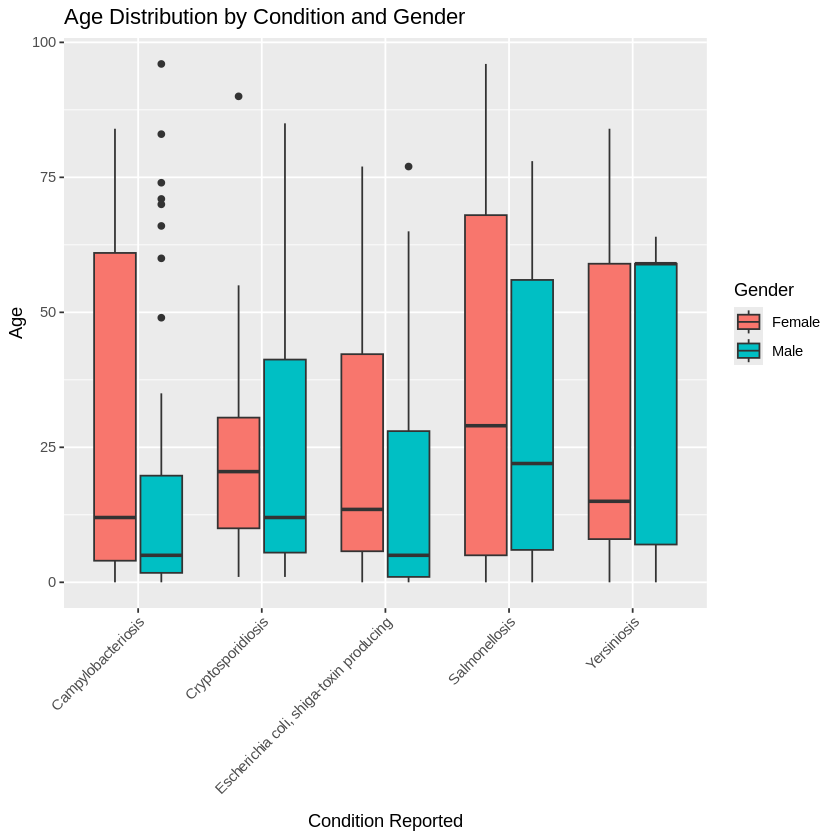

In [7]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Assuming your data is in a data frame called 'epi_data'
# Replace 'epi_data' with the actual name of your data frame

# Define the list of foodborne illnesses
foodborne_illnesses <- c("Campylobacteriosis", "Cryptosporidiosis",
                         "Escherichia coli, shiga-toxin producing", "Infant botulism",
                         "Salmonellosis", "Yersiniosis")

# Filter the data for foodborne illnesses
filtered_data <- epi_data[epi_data$Condition.reported %in% foodborne_illnesses, ]

ggplot(filtered_data, aes(x = Condition.reported, y = Age, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Condition and Gender", x = "Condition Reported", y = "Age") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

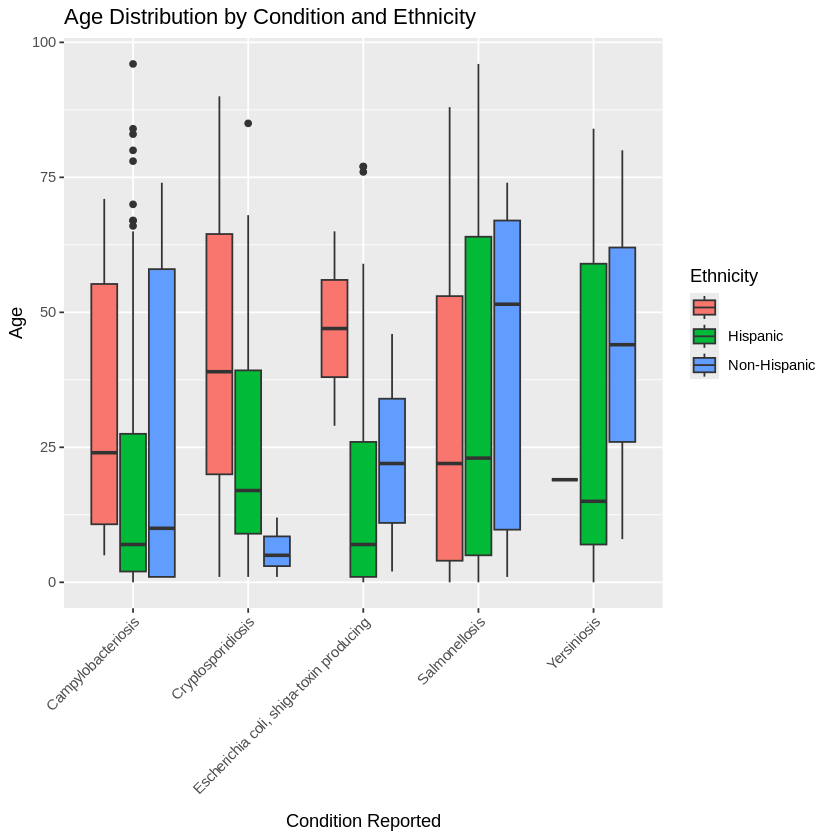

In [8]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Assuming your data is in a data frame called 'epi_data'
# Replace 'epi_data' with the actual name of your data frame

# Define the list of foodborne illnesses
foodborne_illnesses <- c("Campylobacteriosis", "Cryptosporidiosis",
                         "Escherichia coli, shiga-toxin producing", "Infant botulism",
                         "Salmonellosis", "Yersiniosis")

# Filter the data for foodborne illnesses
filtered_data <- epi_data[epi_data$Condition.reported %in% foodborne_illnesses, ]

ggplot(filtered_data, aes(x = Condition.reported, y = Age, fill = Ethnicity)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Condition and Ethnicity", x = "Condition Reported", y = "Age") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))